In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm , preprocessing

In [2]:
df = pd.read_csv("Classified_Dataset.csv")

In [3]:
df.shape

(10000, 9)

In [4]:
df = df.drop(['Domain_Name'], axis = 1).copy()

<AxesSubplot:xlabel='Result', ylabel='count'>

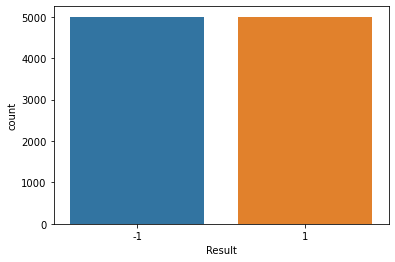

In [5]:
sns.countplot(x = df['Result'])

In [6]:
df

,URL_Depth,Have_At,URL_Length,Redirection,https_Domain,TinyURL,Prefix/Suffix,Result
0,1,-1,1,-1,-1,-1,-1,-1
1,1,-1,1,1,-1,-1,-1,-1
2,1,-1,1,-1,-1,-1,-1,-1
3,3,-1,1,-1,-1,-1,-1,-1
4,3,-1,1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...
9995,3,-1,1,-1,-1,-1,-1,1
9996,1,-1,1,-1,-1,-1,-1,1
9997,1,-1,1,-1,-1,-1,1,1
9998,1,-1,1,1,-1,-1,1,1


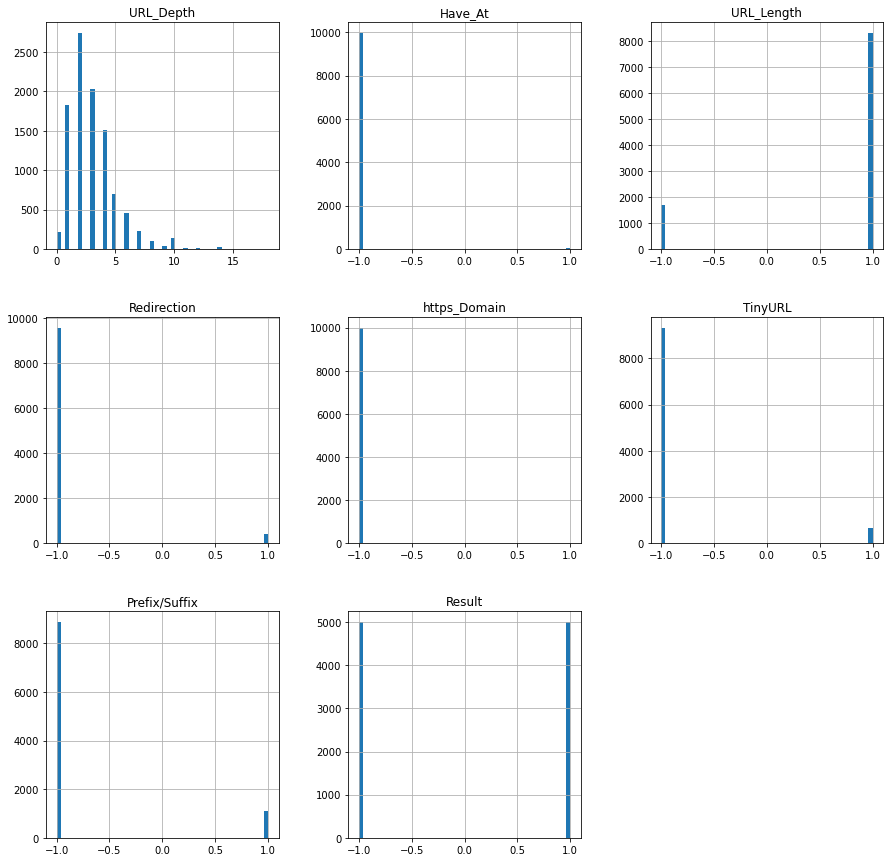

In [7]:
df.hist(bins = 50,figsize = (15,15))
plt.show()

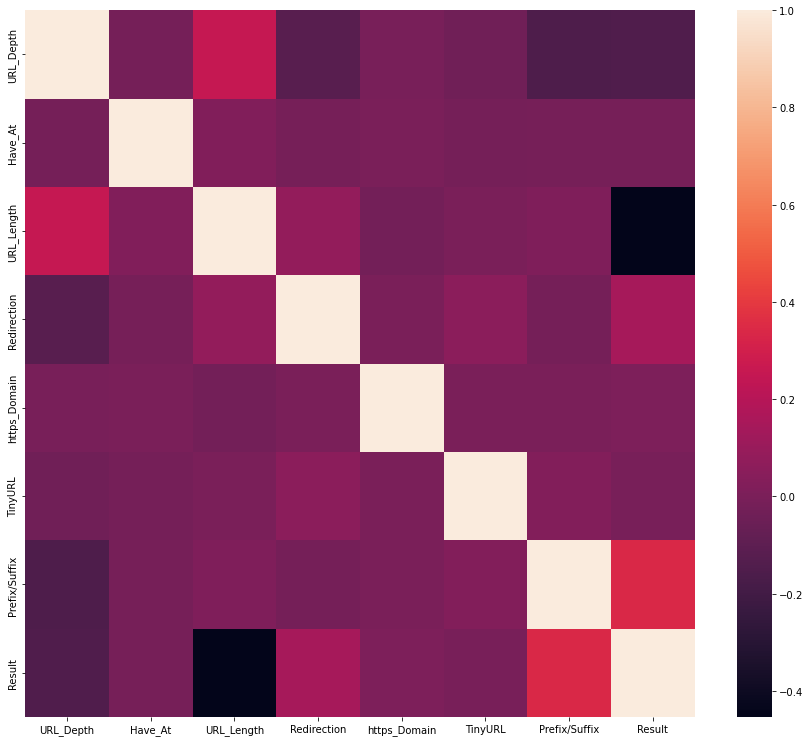

In [8]:
plt.figure(figsize=(15,13))
sns.heatmap(df.corr())
plt.show()

In [9]:
df.describe()

,URL_Depth,Have_At,URL_Length,Redirection,https_Domain,TinyURL,Prefix/Suffix,Result
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.00000
mean,3.031700,-0.992000,0.658800,-0.913400,-0.9998,-0.865600,-0.775600,0.00000
std,1.992961,0.126244,0.752356,0.407084,0.0200,0.500761,0.631256,1.00005
min,0.000000,-1.000000,-1.000000,-1.000000,-1.0000,-1.000000,-1.000000,-1.00000
25%,2.000000,-1.000000,1.000000,-1.000000,-1.0000,-1.000000,-1.000000,-1.00000
50%,3.000000,-1.000000,1.000000,-1.000000,-1.0000,-1.000000,-1.000000,0.00000
75%,4.000000,-1.000000,1.000000,-1.000000,-1.0000,-1.000000,-1.000000,1.00000
max,18.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.00000


In [10]:
df = sklearn.utils.shuffle(df)

In [11]:
def mean_score(scoring):
    return {i:j.mean() for i,j in scoring.items()}

scoring = {'accuracy': 'accuracy',
           'recall': 'recall',
           'precision': 'precision',
           'f1': 'f1'}
fold_count=10

In [12]:
y = df['Result']
X = df.drop('Result',axis=1)
X.shape, y.shape

((10000, 7), (10000,))

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, random_state = 12)

In [14]:
dtree_clf = DecisionTreeClassifier()
cross_val_scores = cross_validate(dtree_clf, X, y, cv = fold_count, scoring = scoring)
dtree_score = mean_score(cross_val_scores)
print(dtree_score)

{'fit_time': 0.004644966125488282, 'score_time': 0.004268002510070801, 'test_accuracy': 0.794, 'test_recall': 0.6176, 'test_precision': 0.9541976676152093, 'test_f1': 0.7497301453817716}


In [15]:
tree = DecisionTreeClassifier(max_depth = 5)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

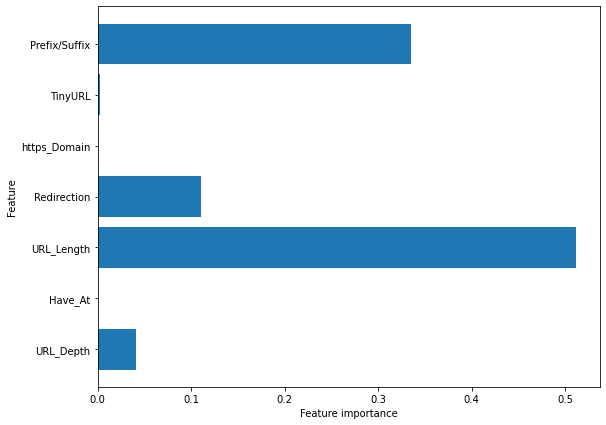

In [16]:
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

In [17]:
rforest_clf=RandomForestClassifier()
cross_val_scores = cross_validate(rforest_clf, X, y, cv=fold_count, scoring=scoring)
rforest_clf_score = mean_score(cross_val_scores)
print(rforest_clf_score)

{'fit_time': 0.2522658109664917, 'score_time': 0.01995687484741211, 'test_accuracy': 0.7939, 'test_recall': 0.6184000000000001, 'test_precision': 0.9528476285653632, 'test_f1': 0.7498924495168581}


In [18]:
forest = RandomForestClassifier(max_depth=5)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

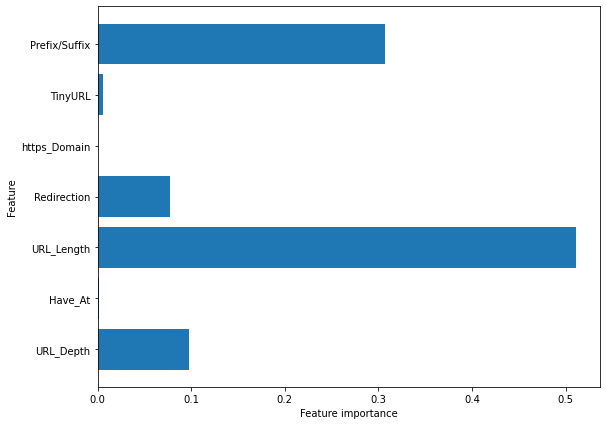

In [19]:
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
###linear
linear_clf = svm.SVC(kernel='linear')
cross_val_scores = cross_validate(linear_clf, X, y, cv=fold_count, scoring=scoring)
linear_svc_clf_score = mean_score(cross_val_scores)
print(linear_svc_clf_score)
###poly
poly_clf = svm.SVC(kernel='poly')
cross_val_scores = cross_validate(poly_clf, X, y, cv=fold_count, scoring=scoring)
poly_svc_clf_score = mean_score(cross_val_scores)
print(poly_svc_clf_score)
###rbf
rbf_clf = svm.SVC(kernel='rbf')
cross_val_scores = cross_validate(rbf_clf, X, y, cv=fold_count, scoring=scoring)
rbf_svc_clf_score = mean_score(cross_val_scores)
print(rbf_svc_clf_score)
###sigmoid
sigmoid_clf = svm.SVC(kernel='sigmoid')
cross_val_scores = cross_validate(sigmoid_clf, X, y, cv=fold_count, scoring=scoring)
sigmoid_svc_clf_score = mean_score(cross_val_scores)
print(sigmoid_svc_clf_score)

{'fit_time': 1.4531378507614137, 'score_time': 0.09269719123840332, 'test_accuracy': 0.7857000000000001, 'test_recall': 0.5897999999999999, 'test_precision': 0.9697612540926663, 'test_f1': 0.7333481002508069}


In [ ]:
KNeighbors_clf = KNeighborsClassifier(3)
cross_val_scores = cross_validate(KNeighbors_clf, X, y, cv = fold_count, scoring = scoring)
KNeighbors_clf_score = mean_score(cross_val_scores)
print(KNeighbors_clf_score)

In [ ]:
KNeighbors_clf=KNeighborsClassifier(5)
cross_val_scores = cross_validate(KNeighbors_clf, X, y, cv=fold_count, scoring=scoring)
KNeighbors_clf_score = mean_score(cross_val_scores)
print(KNeighbors_clf_score)

In [ ]:
KNeighbors_clf=KNeighborsClassifier(7)
cross_val_scores = cross_validate(KNeighbors_clf, X, y, cv=fold_count, scoring=scoring)
KNeighbors_clf_score = mean_score(cross_val_scores)
print(KNeighbors_clf_score)